In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

Task 1.


In [99]:
covid_data = pd.read_csv("./owid-covid-data.csv")

#날짜 타입으로 변경
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127812,ZWE,Africa,Zimbabwe,2021-10-28,132880.0,72.0,48.571,4675.0,0.0,1.857,8804.565,4.771,3.218,309.763,0.000,0.123,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3966.0,1365439.0,90.473,0.263,3180.0,0.211,0.015,65.5,tests performed,5896902.0,3306845.0,2590057.0,NaN,14221.0,14231.0,39.07,21.91,17.16,NaN,943.0,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
127813,ZWE,Africa,Zimbabwe,2021-10-29,132926.0,46.0,48.286,4675.0,0.0,1.714,8807.613,3.048,3.199,309.763,0.000,0.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2740.0,1368179.0,90.655,0.182,3018.0,0.200,0.016,62.5,tests performed,5914009.0,3315108.0,2598901.0,NaN,17107.0,14174.0,39.19,21.97,17.22,NaN,939.0,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,Na

Task 2.


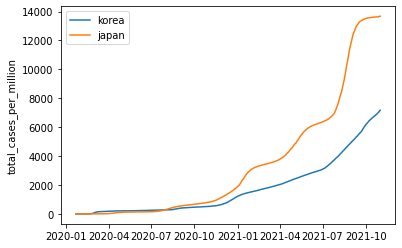

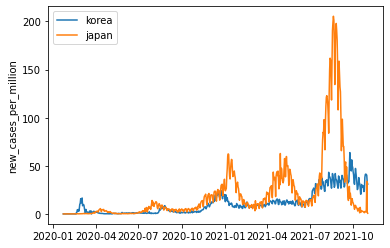

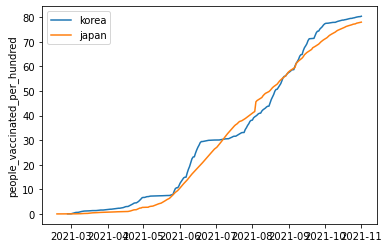

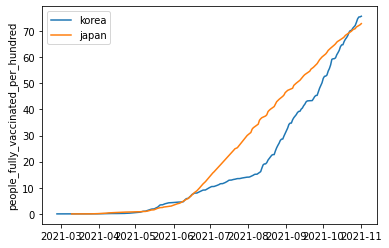

In [100]:
korea = covid_data.loc[covid_data['location'] == 'South Korea', :]
japan = covid_data.loc[covid_data['location'] == 'Japan', :]


#날짜별 확진자 비율 (total_cases_per_million) 시각화
#nan값 처리
jap = japan.dropna(subset=['total_cases_per_million'])
kor = korea.dropna(subset=['total_cases_per_million'])

plt.plot(kor['date'], kor['total_cases_per_million'], label = 'korea')
plt.plot(jap['date'], jap['total_cases_per_million'], label = 'japan')
plt.ylabel('total_cases_per_million')
plt.legend()
plt.show()


#날짜별 신규 확진자 비율 (new_cases_per_million) 시각화
#nan값 처리
jap = japan.dropna(subset=['new_cases_per_million'])
kor = korea.dropna(subset=['new_cases_per_million'])

plt.plot(kor['date'], kor['new_cases_per_million'], label = 'korea')
plt.plot(jap['date'], jap['new_cases_per_million'], label = 'japan')
plt.ylabel('new_cases_per_million')
plt.legend()
plt.show()





#날짜별 백신 접종자 비율 (people_vaccinated_per_hundred) 시각화
#nan값 처리
jap = japan.dropna(subset=['people_vaccinated_per_hundred'])
kor = korea.dropna(subset=['people_vaccinated_per_hundred'])

plt.plot(kor['date'], kor['people_vaccinated_per_hundred'], label = 'korea')
plt.plot(jap['date'], jap['people_vaccinated_per_hundred'], label = 'japan')
plt.ylabel('people_vaccinated_per_hundred')
plt.legend()
plt.show()



#날짜별 백신 접종 완료자 비율 (people_fully_vaccinated_per_hundred) 시각화
#nan값 처리
jap = japan.dropna(subset=['people_fully_vaccinated_per_hundred'])
kor = korea.dropna(subset=['people_fully_vaccinated_per_hundred'])

plt.plot(kor['date'], kor['people_fully_vaccinated_per_hundred'], label = 'korea')
plt.plot(jap['date'], jap['people_fully_vaccinated_per_hundred'], label = 'japan')
plt.ylabel('people_fully_vaccinated_per_hundred')
plt.legend()
plt.show()



Task 3.

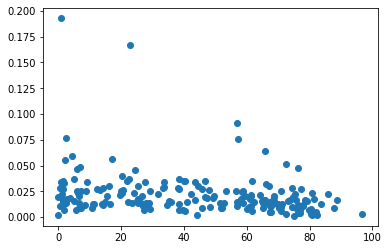

In [101]:
covid_data_pressed = covid_data[['location', 'date', 'total_deaths_per_million','total_cases_per_million','people_vaccinated_per_hundred', 'human_development_index']]

covid_data_groupped = covid_data_pressed.groupby('location').max()
#total_cases_per_million(분모) nan값 제거
covid_data_ptt = covid_data_groupped.dropna(subset=['total_cases_per_million'])

x = covid_data_ptt['people_vaccinated_per_hundred']
y1 = covid_data_ptt['total_deaths_per_million']
y2 = covid_data_ptt['total_cases_per_million']

y = y1/y2

plt.scatter(x, y)
plt.show()


In [102]:
#Pearson Correlation Coefficient 구하기
def pearson(a1, a2):
  a1_c = a1 - a1.mean()
  a2_c = a2 - a2.mean()

  denom = np.sqrt(np.sum(a1_c ** 2) * np.sum(a2_c ** 2))
  if denom != 0:
    return np.sum(a1_c*a2_c)/denom
  else:
    return 0

print("백신 접종률과 확진자 비율 대비 사망자 비율 사이의 상관계수: ", pearson(x,y))

백신 접종률과 확진자 비율 대비 사망자 비율 사이의 상관계수:  -0.25159355063702976


Task 4.


In [103]:
import torch

#Nan 제거
covid_data_groupped = covid_data_groupped.dropna(subset=['human_development_index'])
covid_data_groupped = covid_data_groupped.dropna(subset=['people_vaccinated_per_hundred'])

hdi = covid_data_groupped['human_development_index']
pvp = covid_data_groupped['people_vaccinated_per_hundred']

#Task 4-1
print("HDI 계수 : ",pearson(hdi, pvp))


#Task 4-2
x_train = torch.FloatTensor([[i] for i in hdi])
y_train = torch.FloatTensor([[i] for i in pvp])

W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 0.01

for epoch in range(40001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.mm(x_train, W) + b
  cost = torch.mean((hypothesis - y_train) ** 2)
  cost.backward()
  with torch.no_grad() as grd:
    W = W - lr* W.grad
    b = b - lr *b.grad
  # if epoch % 1000 == 0:
  #   print( 'epoch: {}, cost: {:.6f}, W: {}, b: {}'.format(epoch, cost.item(), W.squeeze(), b.squeeze()))

print('W: {}, b: {}'.format(W.squeeze(), b.squeeze()))

HDI 계수 :  0.8176363667248819
W: 149.84852600097656, b: -66.10568237304688


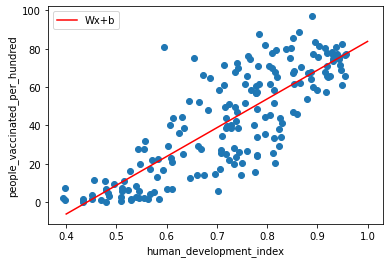

In [104]:
#Task 4-3


plt.scatter(hdi, pvp)
plt.plot([0.4,1],[0.4*W+b, W+b], c='red', label = 'Wx+b')
plt.xlabel('human_development_index')
plt.ylabel('people_vaccinated_per_hundred')
plt.legend()
plt.show()